Normalized Neuron Weights (Hebbian/Oja): [0.72102415 0.69290993]
Normalized Principal Component (PCA): [0.78569676 0.61861184]


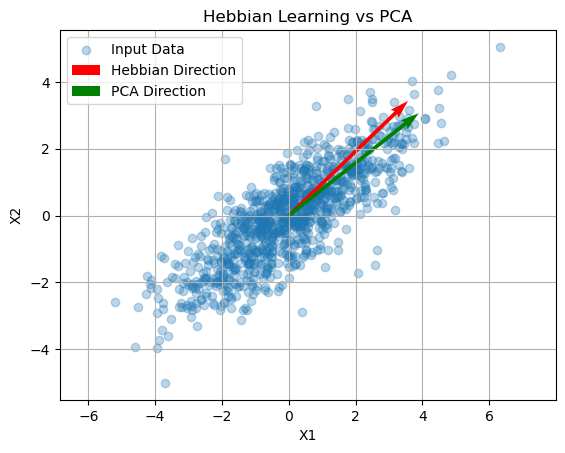

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate an arbitrary input distribution
def generate_data(samples=1000):
    """Generates data with a specified distribution."""
    mean = [0, 0]  # Mean of the distribution
    cov = [[3, 2], [2, 2]]  # Covariance matrix
    data = np.random.multivariate_normal(mean, cov, samples)
    return data

# Define a single linear neuron with Hebbian learning (Oja's rule)
class LinearNeuronHebbian:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)  # Initialize weights randomly
        self.learning_rate = learning_rate

    def train(self, data, epochs=1):
        """Train the neuron using Oja's rule for stability."""
        for epoch in range(epochs):
            for x in data:
                x = x.reshape(-1)  # Ensure input is a 1D array
                y = np.dot(self.weights, x)  # Neuron activation
                # Oja's rule: Δw = η y (x - y w)
                self.weights += self.learning_rate * y * (x - y * self.weights)

    def get_weights(self):
        return self.weights

# Generate input data
data = generate_data(samples=1000)

# Initialize and train the neuron
input_dim = data.shape[1]
learning_rate = 0.01
neuron = LinearNeuronHebbian(input_dim=input_dim, learning_rate=learning_rate)

# Train the neuron for multiple epochs
epochs = 10
neuron.train(data, epochs=epochs)

# Extract the principal component using PCA for comparison
pca = PCA(n_components=1)
pca.fit(data)
principal_component = pca.components_[0]

# Normalize the neuron's weights and principal component for comparison
weights_normalized = neuron.get_weights() / np.linalg.norm(neuron.get_weights())
principal_component_normalized = principal_component / np.linalg.norm(principal_component)

# Print results
print("Normalized Neuron Weights (Hebbian/Oja):", weights_normalized)
print("Normalized Principal Component (PCA):", principal_component_normalized)

# Visualize the data and learned direction
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Input Data")
plt.quiver(0, 0, weights_normalized[0], weights_normalized[1], color='r', scale=3,
           label="Hebbian Direction")
plt.quiver(0, 0, principal_component_normalized[0], principal_component_normalized[1],
           color='g', scale=3, label="PCA Direction")
plt.legend()
plt.title("Hebbian Learning vs PCA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.axis('equal')
plt.show()
